## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [19]:
#db credential
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'
dialect = 'postgresql'

In [20]:
#create connection
def sqla_form(dialect, user, pw, host, port, db):
    db_url = '{}://{}:{}@{}:{}/{}'.format(dialect, user, pw, host, port, db)
    return create_engine(db_url)
engine = sqla_form(dialect, postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db)

In [7]:
engine?

In [21]:
engine.table_names()

['studentsperformance']

In [24]:
#run query
sql = '''
SELECT
    *
FROM
    studentsperformance
'''
stperf_df = pd.read_sql_query(sql, con=engine)

In [25]:
stperf_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [73]:
stperf_df.columns = stperf_df.columns.to_series().replace(' ', '_', regex=True)
stperf_df.columns = stperf_df.columns.to_series().replace('/', '_', regex=True)

stperf_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
stperf_bygender_df = stperf_df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].agg(np.mean)
stperf_bygender_df.head()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


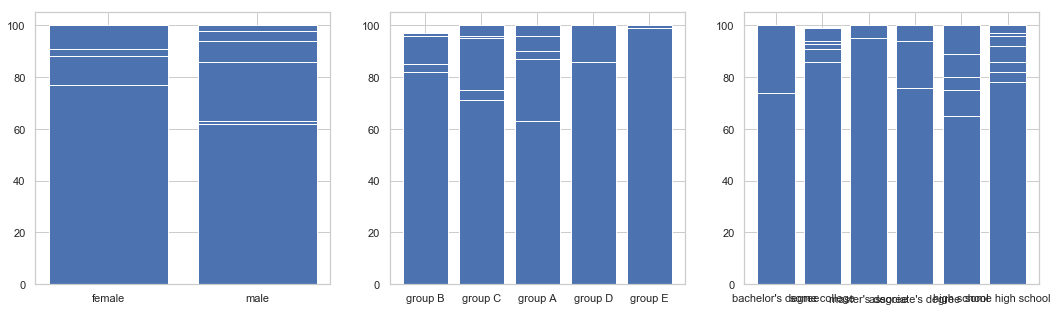

In [82]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("whitegrid")

plt.subplot(1,3,1)
plt.bar(stperf_df.gender, stperf_df['math_score'])

plt.subplot(1,3,2)
plt.bar(stperf_df.race_ethnicity, stperf_df['reading_score'])
                                    
plt.subplot(1,3,3)
plt.bar(stperf_df.parental_level_of_education, stperf_df['writing_score'])
plt.show()                                    

I am not sure why these all show the same numbers, nor what the division marks are in the bars.?

In [81]:
pd.DataFrame.melt?

In [83]:
stperf_tidy_df = stperf_df.melt(id_vars=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 
                                'test_preparation_course'],
                                value_vars=['math_score', 'reading_score', 'writing_score'],
                                var_name='test', value_name='score')
stperf_tidy_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,test,score
0,female,group B,bachelor's degree,standard,none,math_score,72
1,female,group C,some college,standard,completed,math_score,69
2,female,group B,master's degree,standard,none,math_score,90
3,male,group A,associate's degree,free/reduced,none,math_score,47
4,male,group C,some college,standard,none,math_score,76


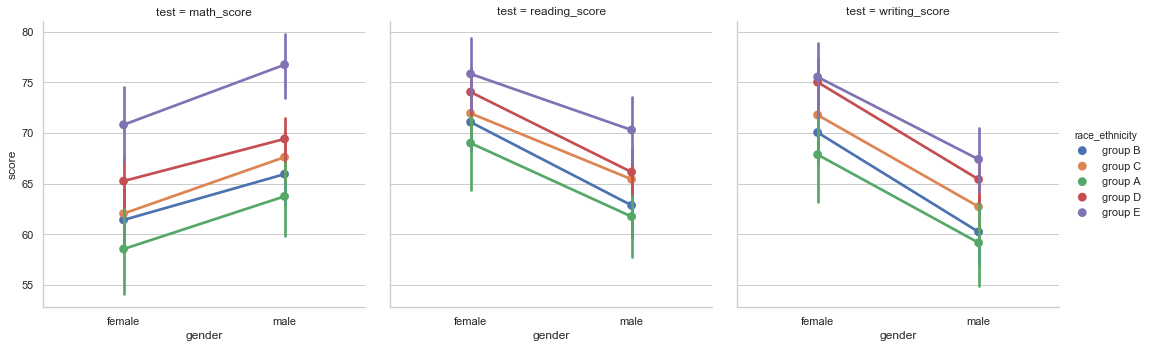

In [101]:
sns.catplot(x="gender", y="score", col='test', data=stperf_tidy_df, kind='point', hue="race_ethnicity")

Q: how much do you want to break down by individual subcategories vs looking at just simple category splits?

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

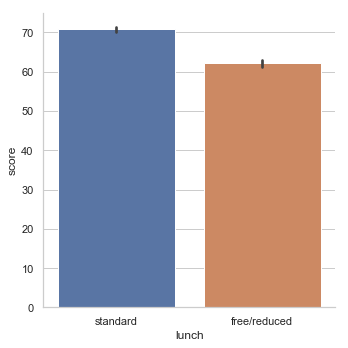

In [107]:
sns.catplot(data=stperf_tidy_df, x='lunch', y='score', kind='bar')

The score is lower free/reduced lunches. This is clearly related to socioeconomic status of those receiving subsides on their lunches, which correlates with lots of things. 

3. Does the test preparation course seem to have an effect on the exam performances?

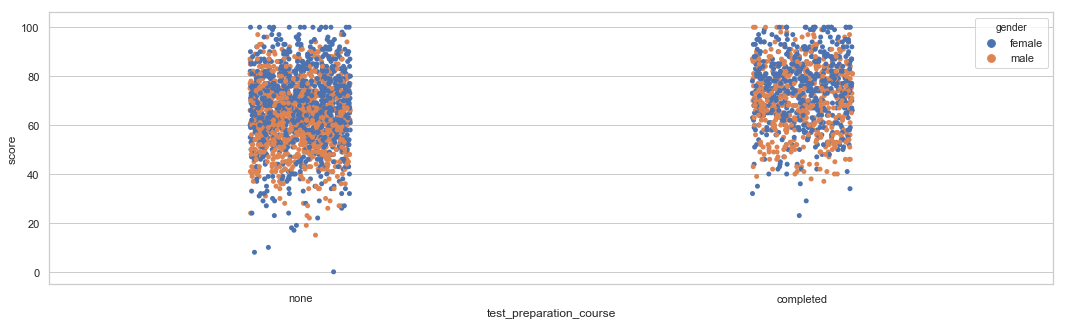

In [110]:
sns.stripplot(data=stperf_tidy_df, x='test_preparation_course', y='score', hue='gender' )

Yes, though whether it causes improved scores is another question.

4. Which 2 exam scores are most correlated with each other?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_2/solution.ipynb).

In [129]:
pd.DataFrame.corr?

In [123]:
stperf_corr_df = stperf_df[stperf_df.notna()].corr()
stperf_corr_df

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


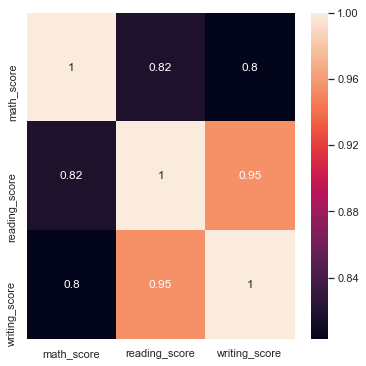

In [127]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("darkgrid")

ax = sns.heatmap(data=stperf_corr_df, square=False, annot=True)

All of the scores are highly correlated, but writing and reading are the most closely correlated. 

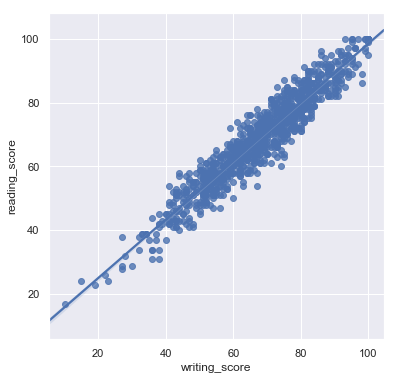

In [132]:
sns.regplot(data=stperf_df, x='writing_score', y='reading_score', fit_reg=True);